In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join

import networkx as nx
import matplotlib.pyplot as plt
import pylab

import random

data_folder = 'data/'

In [2]:
from data_utils import load_dataset, prepare_task, get_students, get_task_number, get_task_name
    
data = load_dataset(data_folder)
snapshots = data['program_snapshots']
tasks = data['task_sessions']

In [3]:
tasks.head()

id  student  task  solved                        start  \
0  39      917    26   False  2017-11-13T10:58:19.666306Z   
1  28      584    41    True  2017-11-12T08:57:39.741460Z   
2  13       29     8    True  2017-11-10T12:24:07.602156Z   
3   1        5    25    True  2017-11-10T10:25:08.451949Z   
4  14       29    38   False  2017-11-10T12:25:55.411733Z   

                           end  time_spent  
0  2017-11-13T10:59:21.969801Z          62  
1  2017-11-12T08:58:43.087657Z          63  
2  2017-11-10T12:24:24.986604Z          17  
3  2017-11-10T10:25:22.612931Z          14  
4  2017-11-10T12:25:55.411745Z           0

In [5]:
task_number = 5

sorted_task = prepare_task(task_number, snapshots, tasks, False)
students = get_students(sorted_task)
print('Rows in file:', len(sorted_task.index))

Rows in file: 927


/home/morpheus/repos/fi/IV127/robomise/data_utils.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  cur_task['time'] = pd.to_datetime(cur_task['time'])


In [36]:
sorted_task.head()

id_x  task_session                       time program granularity  order  \
126   127            22 2017-11-12 08:46:12.044501       l        edit      1   
127   128            22 2017-11-12 08:46:16.860745      ls        edit      2   
128   129            22 2017-11-12 08:46:23.223114     lsr        edit      3   
129   130            22 2017-11-12 08:46:25.170492    lsrr        edit      4   
130   131            22 2017-11-12 08:46:32.869093   lsrrl        edit      5   

    correct  time_from_start  time_delta  id_y  student  task solved  \
126     NaN               40          40    22      584    23   True   
127     NaN               45           5    22      584    23   True   
128     NaN               51           6    22      584    23   True   
129     NaN               53           2    22      584    23   True   
130     NaN               61           8    22      584    23   True   

                           start                          end  time_spent  
126  2017-11-12T08:45:31.357977Z  2017-11-12T08:46:59.764837Z          88  
127  2017-11-12T08:45:31.357977Z  2017-11-12T08:46:59.764837Z          88  
128  2017-11-12T08:45:31.357977Z  2017-11-12T08:46:59.764837Z          88  
129  2017-11-12T08:45:31.357977Z  2017-11-12T08:46:59.764837Z          88  
130  2017-11-12T08:45:31.357977Z  2017-11-12T08:46:59.764837Z          88

In [47]:
from statistics import task_solution_count

sol_count = task_solution_count('data/')


/home/morpheus/fi/IV127/robomise/data_utils.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  cur_task['time'] = pd.to_datetime(cur_task['time'])


/home/morpheus/fi/IV127/robomise/data_utils.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  cur_task['time'] = pd.to_datetime(cur_task['time'])


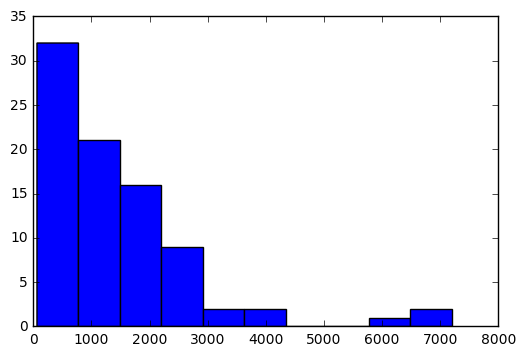

In [41]:
from statistics import tasks_solution_hist

tasks_solution_hist('data/')

In [42]:
sorted_task.sort_values(by='student').head(20)

id_x  task_session                       time   program granularity  \
126   127            22 2017-11-12 08:46:12.044501         l        edit   
127   128            22 2017-11-12 08:46:16.860745        ls        edit   
128   129            22 2017-11-12 08:46:23.223114       lsr        edit   
129   130            22 2017-11-12 08:46:25.170492      lsrr        edit   
130   131            22 2017-11-12 08:46:32.869093     lsrrl        edit   
131   132            22 2017-11-12 08:46:35.349993    lsrrll        edit   
132   133            22 2017-11-12 08:46:39.726244   lsrrlll        edit   
133   134            22 2017-11-12 08:46:59.774046   lsrrlll   execution   
325   326            59 2017-11-14 10:01:49.393368   lsrrllf   execution   
324   325            59 2017-11-14 10:01:43.338860   lsrrllf        edit   
323   324            59 2017-11-14 10:01:39.198014    lsrrll        edit   
321   322            59 2017-11-14 10:01:31.834217      lsrr        edit   
322   323            59 2017-11-14 10:01:36.896536     lsrrl        edit   
319   320            59 2017-11-14 10:01:08.863339        ls   execution   
318   319            59 2017-11-14 10:01:05.421369        ls        edit   
317   318            59 2017-11-14 10:01:00.054951         l   execution   
316   317            59 2017-11-14 10:00:57.390380         l        edit   
320   321            59 2017-11-14 10:01:19.788519       lsr        edit   
526   527            84 2017-11-14 17:23:10.513027    fffrfl        edit   
517   518            84 2017-11-14 17:22:20.116247  fffrflll        edit   

     order correct  time_from_start  time_delta  id_y  student  task solved  \
126      1     NaN               40          40    22      584    23   True   
127      2     NaN               45           5    22      584    23   True   
128      3     NaN               51           6    22      584    23   True   
129      4     NaN               53           2    22      584    23   True   
130      5     NaN               61           8    22      584    23   True   
131      6     NaN               63           2    22      584    23   True   
132      7     NaN               68           5    22      584    23   True   
133      1    True               88          88    22      584    23   True   
325      3    True               74          41    59     1219    23   True   
324      7     NaN               68           5    59     1219    23   True   
323      6     NaN               63           2    59     1219    23   True   
321      4     NaN               56          12    59     1219    23   True   
322      5     NaN               61           5    59     1219    23   True   
319      2   False               33           9    59     1219    23   True   
318      2     NaN               30           8    59     1219    23   True   
317      1   False               24          24    59     1219    23   True   
316      1     NaN               22          22    59     1219    23   True   
320      3     NaN               44          14    59     1219    23   True   
526     32     NaN              208          24    84     1321    23  False   
517     24     NaN              158           2    84     1321    23  False   

                           start                          end  time_spent  
126  2017-11-12T08:45:31.357977Z  2017-11-12T08:46:59.764837Z          88  
127  2017-11-12T08:45:31.357977Z  2017-11-12T08:46:59.764837Z          88  
128  2017-11-12T08:45:31.357977Z  2017-11-12T08:46:59.764837Z          88  
129  2017-11-12T08:45:31.357977Z  2017-11-12T08:46:59.764837Z          88  
130  2017-11-12T08:45:31.357977Z  2017-11-12T08:46:59.764837Z          88  
131  2017-11-12T08:45:31.357977Z  2017-11-12T08:46:59.764837Z          88  
132  2017-11-12T08:45:31.357977Z  2017-11-12T08:46:59.764837Z          88  
133  2017-11-12T08:45:31.357977Z  2017-11-12T08:46:59.764837Z          88  
325  2017-11-14T10:00:35.241527Z  2017-11-14T10:01:49.379738Z   

In [6]:
solution_lens = {}
for student in students:
    student_entries = sorted_task.loc[sorted_task['student'] == student]
    length = len(student_entries.index)
    solution_lens[length] = 1 + solution_lens.get(length, 0)

In [7]:
solution_lens

{3: 1,
 5: 2,
 8: 5,
 9: 4,
 10: 3,
 11: 1,
 12: 5,
 13: 1,
 14: 4,
 15: 1,
 16: 1,
 17: 1,
 18: 1,
 19: 3,
 20: 2,
 22: 1,
 23: 4,
 24: 3,
 25: 1,
 27: 1,
 28: 2,
 29: 1,
 30: 1,
 31: 1,
 32: 1,
 36: 2,
 45: 1,
 46: 1,
 48: 2,
 56: 2,
 61: 1,
 67: 1,
 68: 1,
 74: 1,
 76: 2,
 93: 1}

In [8]:
print('Number of solutions: ', len(sorted_task.index))

Number of solutions:  1724


In [63]:
rows = len(sorted_task.index)
programs = dict(sorted_task['program'].value_counts() / rows)
programs = {k: int(round(v, 2)*100) for k, v in programs.items()}
limit = 2
print(programs)
print({k : v for k, v in programs.items() if v > limit})

{'fffrsff': 0, 'ffrllsf': 0, 'fsfsfsrrf': 0, 'rfslllf': 0, 'rslllf': 0, 'fffrlsff': 0, 'rsfsf': 0, 'lsfll': 0, 'rrl': 0, 'lsrrllfllff': 0, 'fffrs': 0, 'rffslllr': 0, 'lfrrll': 0, 'lsfllfrr': 0, 'rrffsll': 0, 'rrflfllsf': 0, 'ffrflllf': 0, 'fffrlslf': 0, 'rrfl': 0, 'ffrflll': 0, 'rfrfl': 0, 'lffssff': 0, 'lsrrlrf': 0, 'lrsrll': 0, 'fff': 1, 'rfffslrll': 0, 'rslsfffff': 0, 'rsfsfsfsff': 0, 'rsl': 0, 'fffrlsf': 0, 'fffsssss': 0, 'ffrfllsf': 0, 'rrsll': 0, 'rflssf': 0, 'srfffs': 0, 'rfffllffs': 0, 'rffsfff': 0, 'ffff': 0, 'frffllslfl': 0, 'rslll': 0, 'rffffslf': 0, 'rfffffll': 0, 'fffrlslslfsf': 0, 'rffflfllsff': 0, 'lffffs': 0, 'rffss': 0, 'rsllf': 0, 'rffflsr': 0, 'fsfsf': 0, 'lsrrrflls': 0, 'srs': 0, 'lsrl': 0, 'lsrfllff': 0, 'lffrl': 0, 'ffrll': 0, 'rrlfls': 0, 'flffl': 0, 'fffrfs': 0, 'lfffr': 0, 'rrfllsf': 0, 'sssr': 0, 'rrlfllsl': 0, 'lsrrflll': 0, 'fflff': 0, 'rrfllss': 0, 'sfsrsl': 0, 'lsffrrf': 0, 'lsfllfrrrfff': 0, 'lsrrrrf': 0, 'rfffffsff': 0, 'rrlffsf': 0, 'sssrlsf': 0, 'rrlfl

In [64]:
from graph_utils import create_graph
        
graph = create_graph(students, sorted_task)

In [65]:
graph

{('lsrrr', 'lsrrrr'): 2,
 ('rsss', 'rsssl'): 1,
 ('rffssff', 'rffssff'): 1,
 ('rfffrl', 'rfffr'): 5,
 ('rfffflsss', 'rfffflsss'): 1,
 ('fffrfsf', 'fffrfsff'): 1,
 ('lsrrf', 'lsrrflls'): 1,
 ('lsrr', 'lsrrflls'): 1,
 ('rrlf', 'end'): 1,
 ('rrfflflls', 'rrff'): 2,
 ('fffrl', 'fffrls'): 20,
 ('fffrffss', 'fffrffs'): 1,
 ('rfffllsl', 'rfffll'): 2,
 ('fffrffs', 'fffrffsf'): 1,
 ('rlsrrl', 'rlsrrll'): 1,
 ('fffrfsf', 'fffrfsf'): 3,
 ('lsrffrll', 'lsrffrllf'): 1,
 ('rfffs', 'rfffslsl'): 1,
 ('rffflfllsf', 'rffflfllsff'): 1,
 ('rfffr', 'rfffrl'): 6,
 ('ffffrl', 'ffffrll'): 2,
 ('rllf', 'rllfl'): 1,
 ('rfffsf', 'rfffsfs'): 1,
 ('rl', 'rll'): 1,
 ('rfffl', 'ss'): 1,
 ('fffrsff', 'fffrs'): 1,
 ('rsfflllff', 'rs'): 1,
 ('rlf', 'rlfs'): 1,
 ('lsrrfll', 'lsrr'): 5,
 ('rr', 'rrl'): 8,
 ('rffflls', 'rfffl'): 5,
 ('rffflsls', 'rffflsls'): 2,
 ('rffff', 'rffffsff'): 1,
 ('ffrfs', 'ffrf'): 2,
 ('lsrrf', 'lsrrflr'): 1,
 ('lsrfl', 'lsrflf'): 1,
 ('rrff', 'rrffl'): 2,
 ('rsssssf', 'rsssssf'): 1,
 ('lsl', 'l

In [67]:
def prog_list_with_correct(prog_list, sorted_task):
    """
    Takes a list of programs and returns list of tuples (program, bool),
    where bool value indicates whether the program is correct or not
    """
    new_prog_list = []
    for prog in prog_list:
        # takes first row and returns boolean value
        correct = sorted_task.loc[sorted_task['program']==prog]['correct'].any()
        new_prog_list.append((prog, correct))
        
    return new_prog_list

prog_list = list(programs.keys())
prog_list = prog_list_with_correct(prog_list, sorted_task)
false_prog_list = list(map(lambda x: x[0], filter(lambda x: not x[1], prog_list)))
correct_prog_list = list(map(lambda x: x[0], filter(lambda x: x[1], prog_list)))

In [68]:
programs

{'f': 2,
 'ff': 1,
 'fff': 1,
 'ffff': 0,
 'fffff': 0,
 'ffffff': 0,
 'fffffff': 0,
 'ffffffff': 0,
 'ffffl': 0,
 'ffffll': 0,
 'ffffllf': 0,
 'ffffllff': 0,
 'ffffr': 0,
 'ffffrl': 0,
 'ffffrll': 0,
 'ffffrlll': 0,
 'ffffrlllf': 0,
 'ffffrlls': 0,
 'ffffrllsf': 0,
 'ffffrs': 0,
 'ffffsf': 0,
 'fffl': 0,
 'fffll': 0,
 'fffllf': 0,
 'fffllff': 0,
 'ffflls': 0,
 'fffls': 0,
 'ffflsf': 0,
 'ffflsff': 0,
 'ffflsl': 0,
 'ffflslf': 0,
 'fffr': 2,
 'fffrf': 0,
 'fffrff': 0,
 'fffrfff': 0,
 'fffrffff': 0,
 'fffrffffs': 0,
 'fffrffffsf': 0,
 'fffrfffsf': 0,
 'fffrffs': 0,
 'fffrffsf': 0,
 'fffrffss': 0,
 'fffrffssf': 0,
 'fffrfl': 0,
 'fffrfll': 0,
 'fffrflll': 0,
 'fffrflllf': 0,
 'fffrflllff': 0,
 'fffrflllfff': 0,
 'fffrflls': 0,
 'fffrfllss': 0,
 'fffrfs': 0,
 'fffrfsf': 0,
 'fffrfsff': 0,
 'fffrfsl': 0,
 'fffrfss': 0,
 'fffrfsss': 0,
 'fffrfsssff': 0,
 'fffrl': 1,
 'fffrlf': 0,
 'fffrlfs': 0,
 'fffrlfsl': 0,
 'fffrll': 0,
 'fffrllf': 0,
 'fffrllfsf': 0,
 'fffrlll': 0,
 'fffrlllf': 0,
 'fff

In [69]:
prog_list

[('fffrsff', False),
 ('ffrllsf', False),
 ('fsfsfsrrf', False),
 ('rfslllf', False),
 ('rslllf', False),
 ('fffrlsff', False),
 ('rsfsf', False),
 ('lsfll', False),
 ('rrl', False),
 ('lsrrllfllff', False),
 ('fffrs', False),
 ('rffslllr', False),
 ('lfrrll', False),
 ('lsfllfrr', False),
 ('rrffsll', False),
 ('rrflfllsf', False),
 ('ffrflllf', False),
 ('fffrlslf', False),
 ('rrfl', False),
 ('ffrflll', False),
 ('rfrfl', False),
 ('lffssff', False),
 ('lsrrlrf', False),
 ('lrsrll', False),
 ('fff', False),
 ('rfffslrll', False),
 ('rslsfffff', False),
 ('rsfsfsfsff', False),
 ('rsl', False),
 ('fffrlsf', False),
 ('fffsssss', False),
 ('ffrfllsf', False),
 ('rrsll', False),
 ('rflssf', False),
 ('srfffs', False),
 ('rfffllffs', False),
 ('rffsfff', False),
 ('ffff', False),
 ('frffllslfl', False),
 ('rslll', False),
 ('rffffslf', False),
 ('rfffffll', False),
 ('fffrlslslfsf', False),
 ('rffflfllsff', False),
 ('lffffs', False),
 ('rffss', False),
 ('rsllf', False),
 ('rffflsr', Fa

In [16]:
correct_prog_list

['lsrrllf', 'lsrrlll', 'lsrrlls']

In [79]:
dists = get_distances(false_prog_list, levenshtein)

In [18]:
dists

{('r', 'r'): 0,
 ('r', 'ls'): 2,
 ('r', 'l'): 1,
 ('r', 'lsrr'): 3,
 ('r', 'rff'): 2,
 ('r', 'rfff'): 3,
 ('r', 'rf'): 1,
 ('r', 'lsr'): 2,
 ('r', 'lsrrll'): 5,
 ('r', 'lsrrl'): 4,
 ('r', 'f'): 1,
 ('r', 'rs'): 1,
 ('r', 'rfffl'): 4,
 ('r', 'ff'): 2,
 ('r', 'fff'): 3,
 ('r', 'fffr'): 3,
 ('r', 'rfffls'): 5,
 ('r', 'rffflsl'): 6,
 ('r', 'rfffs'): 4,
 ('r', 'lsrrf'): 4,
 ('r', 's'): 1,
 ('r', 'fffrl'): 4,
 ('r', 'rfffll'): 5,
 ('r', 'lsrrfll'): 6,
 ('r', 'rffff'): 4,
 ('r', 'llfffff'): 7,
 ('r', 'lsrrfl'): 5,
 ('r', 'rr'): 1,
 ('r', 'rffflsf'): 6,
 ('r', 'rffs'): 3,
 ('r', 'lsrrfllf'): 7,
 ('r', 'rffflls'): 6,
 ('r', 'rfffsff'): 6,
 ('r', 'lsrrflll'): 7,
 ('r', 'rffflslf'): 7,
 ('r', 'ss'): 2,
 ('r', 'rfs'): 2,
 ('r', 'fffrls'): 5,
 ('r', 'rffffsf'): 6,
 ('r', 'rfffsfsf'): 7,
 ('r', 'sss'): 3,
 ('r', 'rsf'): 2,
 ('r', 'rffslllff'): 8,
 ('r', 'rffffs'): 5,
 ('r', 'rfffllsl'): 7,
 ('r', 'rrf'): 2,
 ('r', 'rrlffsf'): 6,
 ('r', 'rfffr'): 4,
 ('r', 'rsll'): 3,
 ('r', 'rrffflsff'): 8,
 ('r', '

In [85]:
# init
clusters = 10
prog_len = len(prog_list)
centroids = []

indices = []
for i in range(clusters):
    
    tmp = random.randint(0, prog_len - 1)
    while tmp in indices:
        tmp = random.randint(0, prog_len - 1)
    indices.append(tmp)
    
centroids = [prog_list[i] for i in indices]

In [73]:
def init_centroids(clusters, prog_list):
    """
    Randomly initializes centroids
    
    Inputs:
    - clusters: int; number of clusters
    - prog_list: list of strings
    """
    prog_len = len(prog_list)
    centroids = []

    indices = []
    for i in range(clusters):

        tmp = random.randint(0, prog_len - 1)
        while tmp in indices:
            tmp = random.randint(0, prog_len - 1)
        indices.append(tmp)

    return [prog_list[i] for i in indices]

In [74]:
# find new centroid
def min_average(alist, dists):
    """
    Finds member of alist which has lowest average distance to others
    """
    min_id = alist[0]
    min_dist = average_dist(alist[0], alist, dists)
    
    for i in range(1, len(alist)):
        dist = average_dist(alist[i], alist, dists)
        if dist < min_dist:
            min_dist = dist
            min_id = alist[i]
            
    return min_id, min_dist
    
def average_dist(prog, alist, dists):
    """
    Computes average distances
    """
    if len(alist) == 0:
#         return 10e6
        return 0
    return sum([dists[prog, x] for x in alist]) / len(alist)

def list_mode(alist):
    return pd.Series(alist).value_counts().argmax()

def assign_clusters(centroids, prog_list):
    prog_len = len(prog_list)
    cluster_id = ['']*prog_len
    for i in range(len(prog_list)):
        prog = prog_list[i]
        min_dist = dists[centroids[0], prog]
        min_id = centroids[0]
        for centr in centroids:
            dist = dists[centr, prog]
            if dist < min_dist:
                min_dist = dist
                min_id = centr
        cluster_id[i] = min_id
    return cluster_id
    
def get_new_centroids(centroids, prog_list, cluster_id):
    clusters = len(centroids)
    prog_len = len(prog_list)
    new_centroids = []
    for i in range(clusters):
        # programs from this cluster
        cur_progs = [prog_list[j] for j in range(prog_len) if centroids[i] == cluster_id[j]]
#         print(cur_progs)
        min_id, min_dist = min_average(cur_progs, dists)
#         print(min_id, min_dist)
#         min_id = list_mode(cur_progs)
        new_centroids.append(min_id)
        
    return new_centroids

In [88]:
cluster_id = assign_clusters(centroids, false_prog_list)

KeyError: (('rffsll', False), 'r')

In [28]:
get_new_centroids(centroids, false_prog_list, cluster_id)

NameError: name 'cluster_id' is not defined

In [75]:
# works with averages
def train(prog_list, clusters, verbose=False):
    centroids = init_centroids(clusters, prog_list)
    old_centroids = []
    while centroids != old_centroids:
        old_centroids = centroids
        cluster_ids = assign_clusters(centroids, prog_list)
        centroids = get_new_centroids(centroids, prog_list, cluster_ids)
        
    # results of clustering
    cluster_ids = assign_clusters(centroids, prog_list)
    if verbose:
        print('Final distances and centroids:')
    total_dist = 0
    prog_len = len(prog_list)
    for i in range(clusters):
        cur_progs = [prog_list[j] for j in range(prog_len) if centroids[i] == cluster_ids[j]]
#         print(cur_progs)
        dist = average_dist(centroids[i], cur_progs, dists)
        if verbose:
            print(centroids[i], dist, cur_progs)
        total_dist += dist
    
    if verbose:
        print('Total distance:', total_dist)
    return centroids, total_dist

In [22]:
train(false_prog_list, clusters)

NameError: name 'clusters' is not defined

In [33]:
clusters = 8
res = train(false_prog_list, clusters, False)
min_centroids = res[0]
min_dist = res[1]
for i in range(1000):
    res = train(false_prog_list, clusters, False)
    centrs = res[0]
    dist = res[1]
    if dist < min_dist:
        min_dist = dist
        min_centroids = centrs

In [34]:
print(min_centroids, min_dist)

['rffflss', 'lsrflf', 'rfffll', 'rss', 'ff', 'lsr', 'fffrfs', 'ls'] 16.350721298709814


In [35]:
prog_len = len(false_prog_list)
cluster_ids = assign_clusters(min_centroids, false_prog_list)
cluster_dict = {}
for i in range(clusters):
    cur_progs = [false_prog_list[j] for j in range(prog_len) if min_centroids[i] == cluster_ids[j]]
    cluster_dict[min_centroids[i]] = cur_progs
    print(min_centroids[i], cur_progs)

rffflss ['rfffls', 'rffflsl', 'rfffs', 'rffflsf', 'rffflls', 'rfffsff', 'rffflslf', 'rffffsf', 'rfffsfsf', 'rffffs', 'rfffllsl', 'rrlffsf', 'rrffflsff', 'rffsf', 'rfffsf', 'rffffsff', 'rffllsf', 'lfrrlls', 'rffss', 'rffsls', 'ffrlls', 'rfffslssll', 'rfffrsr', 'rffssss', 'rffflsll', 'lffss', 'ffrfslls', 'rfffss', 'rffsssss', 'rfffrsrf', 'rffflsslsl', 'rfssslls', 'rfffrs', 'lffsssss', 'rffssff', 'rfffllsssss', 'rrlslsf', 'ffflls', 'rfflsl', 'rffflsff', 'rlrfls', 'rfffrrs', 'ffflsl', 'ffrflslls', 'lffffsf', 'ffflsf', 'rrffflsf', 'ffflslf', 'rfffflls', 'rsfsfsfsff', 'rrlflls', 'ffrflsf', 'rffslsllff', 'rrflls', 'rffflsssss', 'rlrfrs', 'rfffflsss', 'ffrflls', 'rffsssssfff', 'rrlfsf', 'rffffssss', 'rfffssf', 'rssslls', 'rffffss', 'rrlfffsf', 'fffsssss', 'fffrfllss', 'rrfffls', 'rfffsss', 'frfflls', 'rfffllfs', 'rffssssfff', 'lffffsff', 'rffffssssf', 'rffflsslls', 'rfffflllss', 'ffflsff', 'rfffllsf', 'rfffslsll', 'rffflrsr', 'rffffslf', 'rffffllls', 'rffflsrf', 'rffffsss', 'rfffllls', 'rfffls

In [36]:
cluster_dict

{'ff': ['rff',
  'rf',
  'f',
  'ff',
  'fff',
  'fffr',
  'ffr',
  'llf',
  'llff',
  'ffrl',
  'rrff',
  'lf',
  'fs',
  'lff',
  'lffr',
  'fr',
  'frf',
  'ffrf',
  'frff',
  'lfff'],
 'fffrfs': ['fffrls',
  'fffrf',
  'fffrs',
  'fffrfl',
  'fffrss',
  'ffrlrls',
  'rsffrrrff',
  'fffrff',
  'sfsrsfs',
  'llffffff',
  'fffrsfff',
  'fffrfsf',
  'llfffffs',
  'fffrlls',
  'fffrffs',
  'fffrffssf',
  'ffrfrls',
  'ffrfl',
  'fffrffsf',
  'fffrlsl',
  'ffrrrls',
  'fffrsl',
  'fffrsff',
  'lfffrs',
  'ffrfs',
  'lffffs',
  'fffrffss',
  'lfffrsfff',
  'fffrfs',
  'fffrsf',
  'lffffffrs',
  'lffffffr',
  'ffrfls',
  'fffrflls'],
 'ls': ['ls', 'l', 's', 'll'],
 'lsr': ['lsrr',
  'lsr',
  'lsrf',
  'lsssr',
  'rlrfr',
  'lsrrr',
  'sfsr',
  'lsffr',
  'sr',
  'lfr',
  'lsfrr',
  'lfrr',
  'lrrf',
  'rlsrr',
  'fsr',
  'rlsr',
  'lsf'],
 'lsrflf': ['lsrrll',
  'lsrrl',
  'lsrrf',
  'lsrrfll',
  'llfffff',
  'lsrrfl',
  'lsrrfllf',
  'lsrrflll',
  'rslllff',
  'lsrff',
  'llfff',
  'rrfl'

In [76]:
graph = create_graph(students, sorted_task)

def create_cluster_graph(graph, cluster_dict, correct_prog_list):

    new_graph = {}
    for key, val in graph.items():
        first = key[0]
        second = key[1]

        if first == 'start':
            new_first = first
        else:
            new_first = ''
        
        if second == 'end':
            new_second = 'end'
            if first in correct_prog_list:
                new_first = 'correct'
        else:
            new_second = ''

        for centroid, cluster_list in cluster_dict.items():
            if new_first != '' and new_second != '':
                break
            if first in cluster_list:
                new_first = centroid
                print(centroid)
            if second in cluster_list:
                new_second = centroid
                print(centroid)
            elif second in correct_prog_list:
                new_second = 'correct'
        # debug
        if new_first == '':
            print('empty first', key, val)
        new_graph[new_first, new_second] = new_graph.get((new_first, new_second), 0) +  val
    return new_graph

correct_prog_list = list(map(lambda x: x[0], filter(lambda x: x[1], prog_list)))
new_graph = create_cluster_graph(graph, cluster_dict, correct_prog_list)

NameError: name 'cluster_dict' is not defined

In [38]:
new_graph

{('', 'correct'): 47,
 ('', 'lsrflf'): 1,
 ('correct', 'end'): 47,
 ('ff', 'end'): 1,
 ('ff', 'ff'): 119,
 ('ff', 'fffrfs'): 9,
 ('ff', 'ls'): 10,
 ('ff', 'lsr'): 2,
 ('ff', 'lsrflf'): 8,
 ('ff', 'rfffll'): 47,
 ('ff', 'rffflss'): 7,
 ('ff', 'rss'): 24,
 ('fffrfs', 'end'): 1,
 ('fffrfs', 'ff'): 8,
 ('fffrfs', 'fffrfs'): 42,
 ('fffrfs', 'ls'): 1,
 ('fffrfs', 'lsrflf'): 5,
 ('fffrfs', 'rfffll'): 5,
 ('fffrfs', 'rffflss'): 6,
 ('fffrfs', 'rss'): 1,
 ('ls', 'ff'): 6,
 ('ls', 'ls'): 66,
 ('ls', 'lsr'): 43,
 ('ls', 'lsrflf'): 8,
 ('ls', 'rss'): 11,
 ('lsr', 'correct'): 6,
 ('lsr', 'end'): 2,
 ('lsr', 'ls'): 3,
 ('lsr', 'lsr'): 59,
 ('lsr', 'lsrflf'): 54,
 ('lsr', 'rffflss'): 1,
 ('lsr', 'rss'): 3,
 ('lsrflf', 'correct'): 42,
 ('lsrflf', 'end'): 2,
 ('lsrflf', 'ff'): 1,
 ('lsrflf', 'fffrfs'): 5,
 ('lsrflf', 'ls'): 12,
 ('lsrflf', 'lsr'): 17,
 ('lsrflf', 'lsrflf'): 193,
 ('lsrflf', 'rfffll'): 6,
 ('lsrflf', 'rffflss'): 3,
 ('lsrflf', 'rss'): 7,
 ('rfffll', 'end'): 2,
 ('rfffll', 'ff'): 18,
 ('

In [77]:
def run(task_number):
    sorted_task = prepare_task(task_number, snapshots, tasks)
    students = get_students(sorted_task)
    print(students)
    rows = len(sorted_task.index)
    programs = dict(sorted_task['program'].value_counts() / rows)
    programs = {k: int(round(v, 2)*100) for k, v in programs.items()}
    prog_list = list(programs.keys())
    prog_list = prog_list_with_correct(prog_list, sorted_task)
    false_prog_list = list(map(lambda x: x[0], filter(lambda x: not x[1], prog_list)))
    correct_prog_list = list(map(lambda x: x[0], filter(lambda x: x[1], prog_list)))
    print(prog_list)
    graph = create_graph(students, sorted_task)
    dists = get_distances(false_prog_list, levenshtein)
    clusters = 8
    res = train(false_prog_list, clusters, False)
    min_centroids = res[0]
    min_dist = res[1]
    for i in range(1000):
        res = train(false_prog_list, clusters, False)
        centrs = res[0]
        dist = res[1]
        if dist < min_dist:
            min_dist = dist
            min_centroids = centrs
            
    prog_len = len(false_prog_list)
    cluster_ids = assign_clusters(min_centroids, false_prog_list)
    cluster_dict = {}
    for i in range(clusters):
        cur_progs = [false_prog_list[j] for j in range(prog_len) if min_centroids[i] == cluster_ids[j]]
        cluster_dict[min_centroids[i]] = cur_progs
#         print(min_centroids[i], cur_progs)
        
    new_graph = create_cluster_graph(graph, cluster_dict, correct_prog_list)
    return new_graph

In [78]:
run(5)

/home/morpheus/fi/IV127/robomise/data_utils.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  cur_task['time'] = pd.to_datetime(cur_task['time'])


[8706, 5130, 8845, 8600, 9113, 9115, 8477, 9118, 9119, 8872, 8873, 9003, 9005, 8879, 2481, 8884, 8631, 9015, 8889, 8633, 8890, 8635, 9024, 8903, 8904, 8777, 8907, 9169, 9046, 8923, 8937, 9069, 8945, 9074, 9077, 8955, 9087]
[('R2{Iy{r}lf}', False), ('R10{fIr{r}}', False), ('R3{fIy{r}l}', False), ('rW!y{R2{rl}}', False), ('I!b{W!b{frl}}', False), ('R3{I!y{f}Wb{r}}', False), ('I!b{W!y{rfl}}', False), ('R7{fIy{rl}}', False), ('fIy{rl}', False), ('R2{Iy{rf}}', False), ('W!b{I!y{rl}f}', False), ('I!y{f}Iy{rl}', False), ('I!y{f}rf', False), ('R8{fIy{rl}}', False), ('W!y{fIy{r}}', False), ('fI!y{r}', False), ('W!b{f}I!y{rl}', False), ('Ik{f}Iy{rl}', False), ('W!b{fIy{r}l}', False), ('R5{fIy{rl}}', True), ('Wk{fWy{rl}}', True), ('I!b{Wk{frl}}', False), ('W!b{Iy{rl}}f', False), ('I{f}', False), ('W!y{f}Iy{r}', False), ('fIy{rl}f', False), ('R3{fIy{rl}}', False), ('W!y{f}', False), ('W!y{f}Iy{rl}', False), ('R10{I!y{frl}}', False), ('R2{Iy{f}}', False), ('W!b{frff}', False), ('R2{I!y{frl}}', Fals

KeyError: ('W!y{f}Iy{r}', 'R2{Iy{r}lf}')

In [ ]:
# todo:
"""
- do not cluster correct and wrong programs together
- automatic cluster number
- create graph with clusters ... OK
""" 

In [36]:
a = [1, 2, 3, 4, 4]


In [39]:
pd.Series(a).value_counts().argmax()

4